#**Prologue**

Airline flight delays are a common occurrence in the aviation industry, often caused by a variety of factors such as weather conditions, technical issues, air traffic control, and more. These delays can have a significant impact on passengers, causing inconvenience and affecting travel plans. Airlines also suffer from the financial and operational consequences of flight delays. Therefore, understanding the root causes of flight delays and developing strategies to minimize their impact has become a priority for the aviation industry.

**Objective**<br>
* Make a model prediction for delay from airlines.

$\textbf{Syarifudin Naufal}$ <br>
Email : syarifuddin.naufal@gmail.com<br>
Phone : +628211404214<br>
Linkedin : https://www.linkedin.com/in/syarifudin-naufal/
<br>

## Install necessary Library

## Library

In [ ]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import re
#import sweetviz
import matplotlib
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.tree import plot_tree 
from sklearn import preprocessing
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# **Load and Describe Data**

## Load Data

This study using dataset provided by JIMS CHACKO, which contain detailed type of Airline, Airport destination, day of weeks, etc

Source:
[US Airlines Flight Analysis and Delay Prediction](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay)

In [ ]:
Airlines_original = pd.read_csv('Airlines.csv')

In [ ]:
Airlines_original

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


Always make a copy for backup plan

In [ ]:
Airlines = Airlines_original.copy()

In [ ]:
print('Total Row', Airlines.shape[0], ' ,Total Feature', Airlines.shape[1],'\n')
Airlines.head(5)

Total Row 539383  ,Total Feature 9 



,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
# Drop ID column from dataset
Airlines = Airlines.drop(columns = ['id'])

## Data Description

Category Definitions:

1.   ID - Unique row identifier ID.
2.   Airline - Abreviated name of different commericial airlines.
3.   Flight - Tell about the type of aircraft used.
4.   AirportFrom - The airport origin for the flight.
5.   AirportTo - The airport destination for the flight.
6.   DayOfWeek - Day of the week when the flight took place.
7.   Time - Time of flight.
8.   Length - Length of flight.
9.   Delay - Whether or not there was a delay.

In [ ]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flight                   539383 non-null  int64  
 1   DayOfWeek                539383 non-null  int64  
 2   Time                     539383 non-null  int64  
 3   Length                   539383 non-null  int64  
 4   Delay                    539383 non-null  int64  
 5   AirportTo_freq_encode    539383 non-null  float64
 6   AirportFrom_freq_encode  539383 non-null  float64
 7   Airline_freq_encode      539383 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 32.9 MB


In [ ]:
Airlines.describe()

,Flight,DayOfWeek,Time,Length,Delay,AirportTo_freq_encode,AirportFrom_freq_encode,Airline_freq_encode
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442,0.019603,0.019595,0.083905
std,2067.429837,1.914664,278.045911,70.117016,0.497015,0.017110,0.017105,0.049200
min,1.000000,1.000000,10.000000,0.000000,0.000000,0.000004,0.000004,0.010341
25%,712.000000,2.000000,565.000000,81.000000,0.000000,0.006439,0.006496,0.051205
50%,1809.000000,4.000000,795.000000,115.000000,0.000000,0.015850,0.015846,0.067865
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000,0.028844,0.028842,0.112981
max,7814.000000,7.000000,1439.000000,655.000000,1.000000,0.063851,0.063867,0.174453


# **Baseline Model**

## Check Null and Missing Values

Melakukan pengecekan terhadap dataset akan ada atau tidaknya Missing Value atau Duplicate Value

Observation:

1.   Dataset terdiri dari 8 kolom dengan 539383 baris
2.   Tidak ditemukan adanya Missing value 




In [ ]:
# Check ratio for missing values
Airlines.isna().sum() * 100 / len(Airlines)

Flight                     0.0
DayOfWeek                  0.0
Time                       0.0
Length                     0.0
Delay                      0.0
AirportTo_freq_encode      0.0
AirportFrom_freq_encode    0.0
Airline_freq_encode        0.0
dtype: float64

In [ ]:
# Check ratio for missing values
Airlines.isnull().sum() * 100 / len(Airlines)

Flight                     0.0
DayOfWeek                  0.0
Time                       0.0
Length                     0.0
Delay                      0.0
AirportTo_freq_encode      0.0
AirportFrom_freq_encode    0.0
Airline_freq_encode        0.0
dtype: float64

## Categorical Handling

For categorical column more than two distinct value will be handled with 
**"Frequency Encoding"**

In [ ]:
# grouping by frequency
fq = Airlines.groupby('AirportTo').size()/len(Airlines)
# mapping values to dataframe
Airlines.loc[:, "{}_freq_encode".format('AirportTo')] = Airlines['AirportTo'].map(fq)
# drop original column.
Airlines = Airlines.drop(['AirportTo'], axis=1)

In [ ]:
# grouping by frequency
fqto = Airlines.groupby('AirportFrom').size()/len(Airlines)
# mapping values to dataframe
Airlines.loc[:, "{}_freq_encode".format('AirportFrom')] = Airlines['AirportFrom'].map(fqto)
# drop original column.
Airlines = Airlines.drop(['AirportFrom'], axis=1)

In [ ]:
# grouping by frequency
fqa = Airlines.groupby('Airline').size()/len(Airlines)
# mapping values to dataframe
Airlines.loc[:, "{}_freq_encode".format('Airline')] = Airlines['Airline'].map(fqa)
# drop original column.
Airlines = Airlines.drop(['Airline'], axis=1)

## Sampling Dataset

In [ ]:
Airlines['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

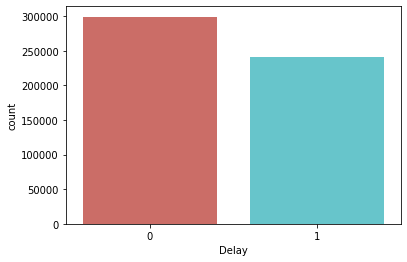

In [ ]:
sns.countplot(x='Delay', data=Airlines, palette='hls')
plt.show()

In [ ]:
count_no_delay = len(Airlines[Airlines['Delay']==0])
count_delay = len(Airlines[Airlines['Delay']==1])
pct_of_no_delay = count_no_delay/(count_no_delay+count_delay)
print("percentage of no delay is", pct_of_no_delay*100)
pct_of_delay = count_delay/(count_no_delay+count_delay)
print("percentage of delay", pct_of_delay*100)

percentage of no delay is 55.455770760294634
percentage of delay 44.544229239705366


In [ ]:
# Split train and test data into 80:20 proportion
train_data, test_data = train_test_split(Airlines, test_size=0.20, random_state=42, shuffle=True)
x_train = train_data.drop(columns='Delay')
x_test = test_data.drop(columns='Delay')

y_train = train_data['Delay']
y_test = test_data['Delay']

print('Shape of training set ', x_train.shape)
print('Shape of test set ', x_test.shape)

Shape of training set  (431506, 8)
Shape of test set  (107877, 8)


In [ ]:
models = [LogisticRegression(random_state=42),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          lgb.LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

baseline = pd.DataFrame(columns = ['Model','F1 score','AUC'])

In [ ]:
for model in models:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  model = str(type(model)).split('.')[-1][:-2]

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2 * (precision * recall)/(precision + recall)

  # ROC AUC
  roc_auc = roc_auc_score(y_test, y_pred)

  baseline = baseline.append({'Model': model,
                           'F1 score': f1,
                                'AUC': roc_auc},
                              ignore_index=True)

In [ ]:
baseline

,Model,F1 score,AUC
0,LogisticRegression,0.461009,0.542704
1,DecisionTreeClassifier,0.581469,0.622108
2,RandomForestClassifier,0.635395,0.684800
3,LGBMClassifier,0.607623,0.673790
4,XGBClassifier,0.570996,0.650067


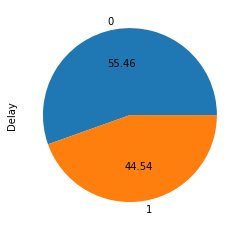

In [ ]:
# Check proportion of data
Airlines['Delay'].value_counts().plot.pie(autopct='%.2f')

- Since the target feature is imbalance, we will not using accuracy as the evaluation metric instead AUC score will be used as evaluation metrics.
- The performance it's not good enough as baseline, so let's hope the model performance still can be improved.
- I will do EDA & Hypertuning Parameter for trying to increase model performances

# **Data Preprocessing**

## **Data Preparation**

In [ ]:
# Reload dataset
Airlines_2 = pd.read_csv('Airlines.csv')

In [ ]:
Airlines_2.head(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
# Drop Date column from dataset
Airlines_2 = Airlines_2.drop(columns = ['id'])

## Handling Missing Values

For missing values handling, there's no treatment for handle missing values in this dataset since there isn't any missing value found.

In [ ]:
# Check ratio for missing values
Airlines_2.isna().sum() * 100 / len(Airlines_2)

Airline             0.0
Flight              0.0
AirportFrom         0.0
AirportTo           0.0
DayOfWeek           0.0
Delay               0.0
Length_by_hours     0.0
Time_by_hour        0.0
Departure_period    0.0
week                0.0
dtype: float64

## Identifying each column

In [ ]:
# Identify numerical and categorical columns
Numericals = [column_name for column_name in Airlines_2.columns if Airlines_2[column_name].dtype != 'O']
Categoricals = [column_name for column_name in Airlines_2.columns if Airlines_2[column_name].dtype == 'O']

In [ ]:
Numericals

['id', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']

In [ ]:
Categoricals

['Airline', 'AirportFrom', 'AirportTo']

# **Feature Selection and Exploratory Data Analysis (EDA)**

## **Statistical Summary**

In [ ]:
Airlines_2['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [ ]:
# Check numerical data summary
Airlines_2[Numericals].describe()

- `ID`, `DayofWeek`, and `Delay` is discrete value, data distribution can be ignored.
- `Flight`, `Time`, and `Length` somewhat have not symmetrical distribution.
- For other columns have skew distribution. It will be make sure in KDE plot.

In [ ]:
# Check categorical data summary
Airlines_2[Categoricals].describe()

,Airline,AirportFrom,AirportTo
count,539383,539383,539383
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


- `AirportFrom` and `AirportTo` have the same distinct value since both airport are used for arrival and departure
- For all categoricals columns in this dataset have more than two distinct value.

## **Univariate Analysis**

Univariate analysis is a statistical method used to study the properties of a single variable in a dataset. In this case, we will create two visualizations to better understand the data:
*   Box Plot
*   Kernel Density Estimation (KDE) Plot



### **Flight**

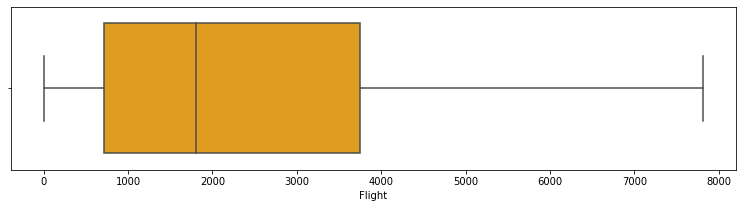

In [ ]:
# Boxplot
plt.figure(figsize=(13, 3))
sns.boxplot(Airlines_2['Flight'],orient='h',color='orange')

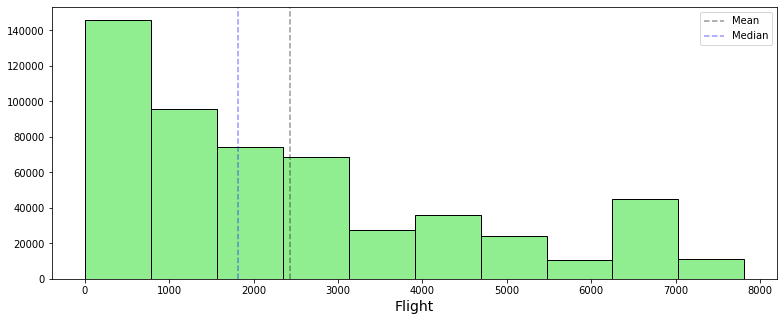

In [ ]:
# KDE Plot
fig = plt.figure(figsize=(13,5))
plt.hist(Airlines_2['Flight'], color='lightgreen', edgecolor = 'Black')
plt.axvline(x=Airlines_2['Flight'].mean(),ls='--',color='black',alpha=0.4,label='Mean')
plt.axvline(x=Airlines_2['Flight'].median(),ls='--',color='blue',alpha=0.4,label='Median')
plt.xlabel('Flight', size=14)
plt.legend()

In [ ]:
# Min and max value at Flight column
print('Min value in Flight is ' + str(Airlines_2['Flight'].min()))
print('Max value in Flight is ' + str(Airlines_2['Flight'].max()))

Min value in Flight is 1
Max value in Flight is 7814


In [ ]:
# Flight outliers
IQR = Airlines_2.Flight.quantile(0.75) - Airlines_2.Flight.quantile(0.25)
Lower_fence = Airlines_2.Flight.quantile(0.25) - (IQR * 3)
Upper_fence = Airlines_2.Flight.quantile(0.75) + (IQR * 3)
print('Flight outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Flight outliers are values < -8387.0 or > 12844.0


### **Time**

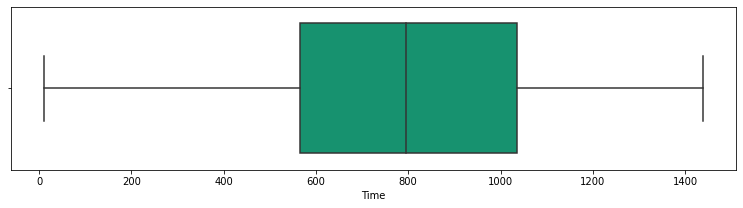

In [ ]:
# Boxplot
plt.figure(figsize=(13, 3))
sns.boxplot(Airlines_2['Time'],orient='h',color='#03A678')

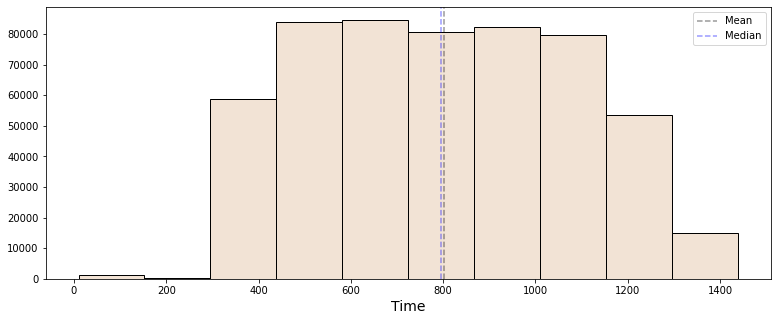

In [ ]:
# KDE Plot
fig = plt.figure(figsize=(13,5))
plt.hist(Airlines_2['Time'], color='#F2E3D5', edgecolor = 'Black')
plt.axvline(x=Airlines_2['Time'].mean(),ls='--',color='black',alpha=0.4,label='Mean')
plt.axvline(x=Airlines_2['Time'].median(),ls='--',color='blue',alpha=0.4,label='Median')
plt.xlabel('Time', size=14)
plt.legend()

In [ ]:
# Min and max value at Time column
print('Min value in Time is ' + str(Airlines_2['Time'].min()))
print('Max value in Time is ' + str(Airlines_2['Time'].max()))

Min value in Time is 10
Max value in Time is 1439


In [ ]:
# Time outliers
IQR = Airlines_2.Time.quantile(0.75) - Airlines_2.Time.quantile(0.25)
Lower_fence = Airlines_2.Time.quantile(0.25) - (IQR * 3)
Upper_fence = Airlines_2.Time.quantile(0.75) + (IQR * 3)
print('Time outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Time outliers are values < -845.0 or > 2445.0


### **Length**

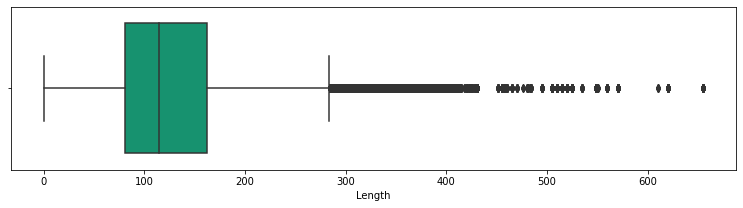

In [ ]:
# Boxplot
plt.figure(figsize=(13, 3))
sns.boxplot(Airlines_2['Length'],orient='h',color='#03A678')

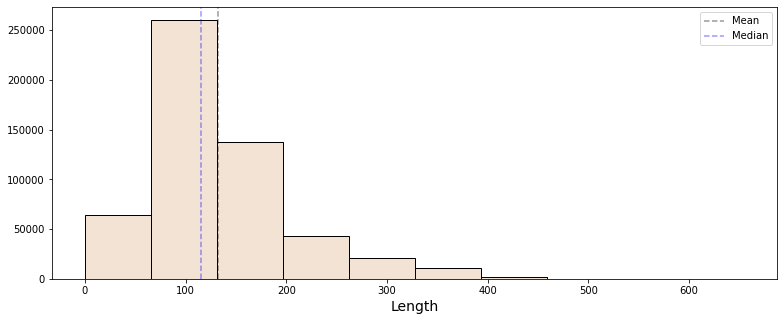

In [ ]:
# KDE Plot
fig = plt.figure(figsize=(13,5))
plt.hist(Airlines_2['Length'], color='#F2E3D5', edgecolor = 'Black')
plt.axvline(x=Airlines_2['Length'].mean(),ls='--',color='black',alpha=0.4,label='Mean')
plt.axvline(x=Airlines_2['Length'].median(),ls='--',color='blue',alpha=0.4,label='Median')
plt.xlabel('Length', size=14)
plt.legend()

In [ ]:
# Min and max value at Length column
print('Min value in Length is ' + str(Airlines_2['Length'].min()))
print('Max value in Length is ' + str(Airlines_2['Length'].max()))

Min value in Length is 0
Max value in Length is 655


In [ ]:
# Length outliers
IQR = Airlines_2.Length.quantile(0.75) - Airlines_2.Length.quantile(0.25)
Lower_fence = Airlines_2.Length.quantile(0.25) - (IQR * 3)
Upper_fence = Airlines_2.Length.quantile(0.75) + (IQR * 3)
print('Length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Length outliers are values < -162.0 or > 405.0


### **DayofWeek**

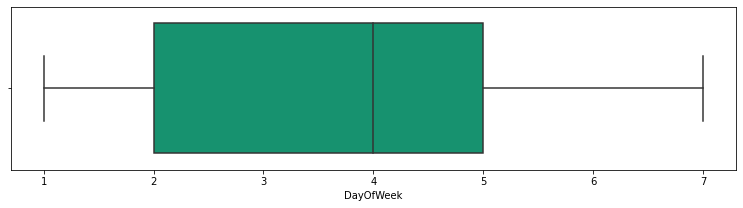

In [ ]:
# Boxplot
plt.figure(figsize=(13, 3))
sns.boxplot(Airlines_2['DayOfWeek'],orient='h',color='#03A678')

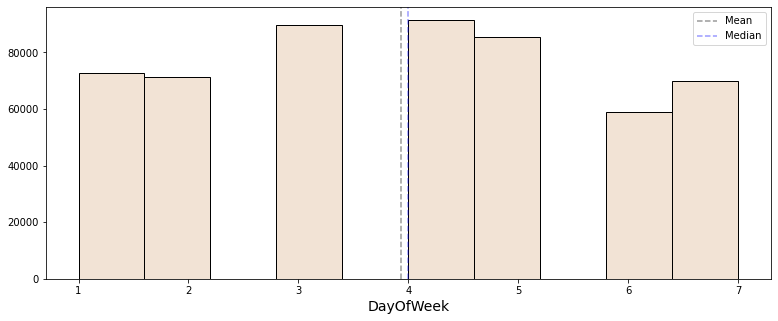

In [ ]:
# KDE Plot
fig = plt.figure(figsize=(13,5))
plt.hist(Airlines_2['DayOfWeek'], color='#F2E3D5', edgecolor = 'Black')
plt.axvline(x=Airlines_2['DayOfWeek'].mean(),ls='--',color='black',alpha=0.4,label='Mean')
plt.axvline(x=Airlines_2['DayOfWeek'].median(),ls='--',color='blue',alpha=0.4,label='Median')
plt.xlabel('DayOfWeek', size=14)
plt.legend()

In [ ]:
# Min and max value at DayofWeek column
print('Min value in DayofWeek is ' + str(Airlines_2['DayOfWeek'].min()))
print('Max value in DayofWeek is ' + str(Airlines_2['DayOfWeek'].max()))

Min value in DayofWeek is 1
Max value in DayofWeek is 7


In [ ]:
# DayofWeek outliers
IQR = Airlines_2.DayOfWeek.quantile(0.75) - Airlines_2.DayOfWeek.quantile(0.25)
Lower_fence = Airlines_2.DayOfWeek.quantile(0.25) - (IQR * 3)
Upper_fence = Airlines_2.DayOfWeek.quantile(0.75) + (IQR * 3)
print('DayofWeek outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

DayofWeek outliers are values < -7.0 or > 14.0


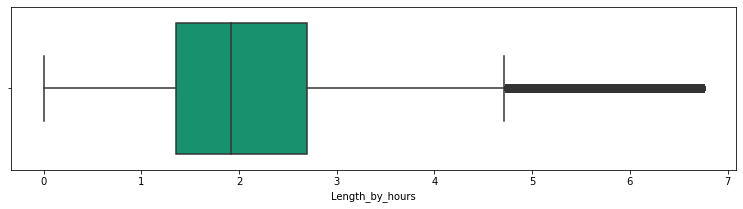

In [ ]:
# Boxplot
plt.figure(figsize=(13, 3))
sns.boxplot(Airlines_2['Length_by_hours'],orient='h',color='#03A678')

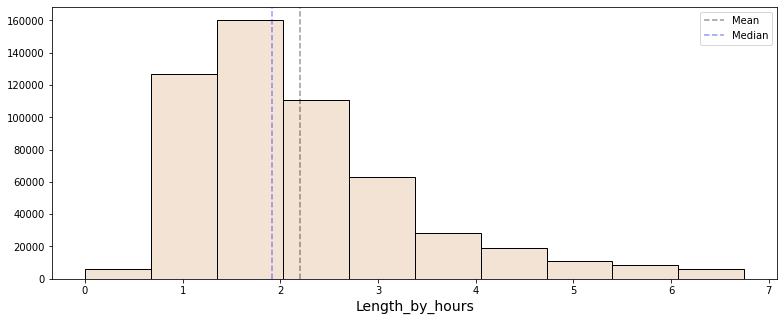

In [ ]:
# KDE Plot
fig = plt.figure(figsize=(13,5))
plt.hist(Airlines_2['Length_by_hours'], color='#F2E3D5', edgecolor = 'Black')
plt.axvline(x=Airlines_2['Length_by_hours'].mean(),ls='--',color='black',alpha=0.4,label='Mean')
plt.axvline(x=Airlines_2['Length_by_hours'].median(),ls='--',color='blue',alpha=0.4,label='Median')
plt.xlabel('Length_by_hours', size=14)
plt.legend()

In [ ]:
# Length_by_hours outliers
IQR = Airlines_2.Length_by_hours.quantile(0.75) - Airlines_2.Length_by_hours.quantile(0.25)
Lower_fence = Airlines_2.Length_by_hours.quantile(0.25) - (IQR * 3)
Upper_fence = Airlines_2.Length_by_hours.quantile(0.75) + (IQR * 3)
print('Length_by_hours outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Length_by_hours outliers are values < -2.7000000000000006 or > 6.750000000000001


## **Bivariate Analysis & Multivariate Analysis**

### **Bivariate Analysis**

Questions
1. What days have the most delays?
2. What airlines has the most delays?
3. Wheter the length of flight has any effect on the delay?
4. Which Airport the flight starts from or is headed to has the most delay
5. in what time period of the day allows the highest flight delay to occur?


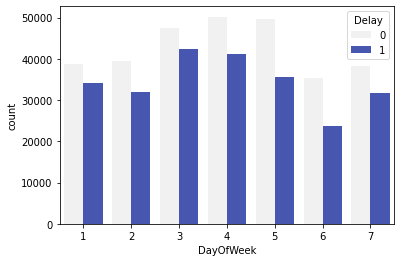

In [ ]:
# What days have the most delays?
sns.countplot(x='DayOfWeek',hue='Delay',data=Airlines_2,color="#364ABF")

In [ ]:
# Airlines with the most delay
air_top = (Airlines_2[Airlines_2['Delay']==1])['Airline'].value_counts().head(10)

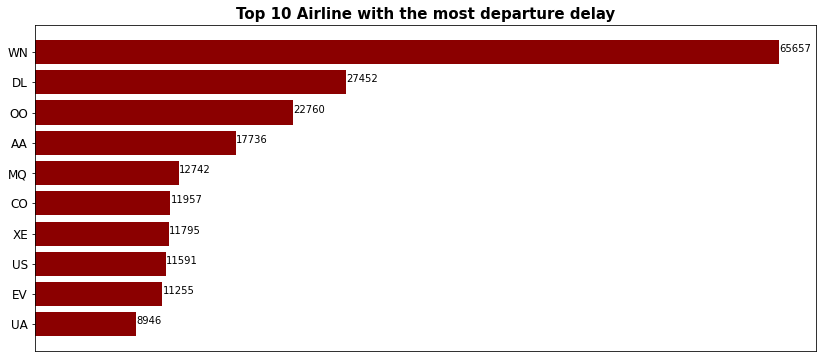

In [ ]:
value_count = air_top.sort_values()

# Vertical bar chart
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()

plt.barh(value_count.index, value_count.values, color='darkred')

for index, value in enumerate(value_count.values):
    plt.text(value, index, str(value))

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_title('Top 10 Airline with the most departure delay', fontsize=15, fontweight='bold');
ax.get_xaxis().set_visible(False)

In [ ]:
# Which Airport the flight starts from or is headed to has the most delay
ap_depart = Airlines_2[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
fig = px.bar(ap_depart, x='AirportFrom', y='Delay')
fig.show()

In [ ]:
ap_dest = Airlines_2[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
fig = px.bar(ap_dest, x='AirportTo', y='Delay')
fig.show()

**Hartsfield-Jackson Atlanta International Airport (ATL)** is an airport that has the highest flight delay rate compared to other airports for both departure and arrival.

In [ ]:
# What day in ATL Airport experience the most flight delay
ATL_Delay = ((Airlines_2[(Airlines_2['AirportFrom']=='ATL')&(Airlines_2['Delay']==1)])
            .groupby('DayOfWeek')
            .agg(delay_count=('Delay','sum'))
            .reset_index()
            .sort_values('DayOfWeek',ascending=True))

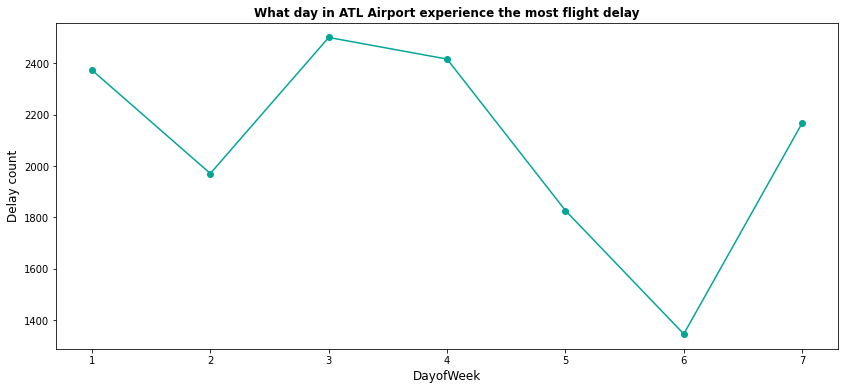

In [ ]:
plt.figure(figsize= (14,6))
plt.plot(ATL_Delay['DayOfWeek'], ATL_Delay['delay_count'], color='#03A696', marker='o')
plt.title('What day in ATL Airport experience the most flight delay', fontsize=12, fontweight='bold')

plt.xlabel('DayofWeek', fontsize=12)
plt.ylabel('Delay count', fontsize=12)
plt.show()

### Feature Extraction

In [ ]:
Airlines_2['Length_by_hours'] = Airlines_2['Length'] / 60
Airlines_2['Time_by_hour'] = Airlines_2['Time'] / 60

In [ ]:
Airlines_2.drop(columns=['Length', 'Time'], inplace=True)

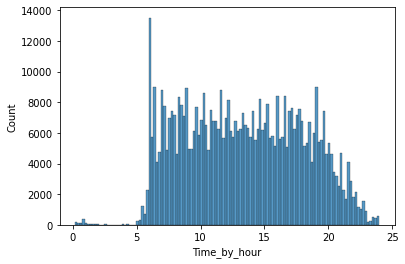

In [ ]:
sns.histplot(Airlines_2['Time_by_hour'])

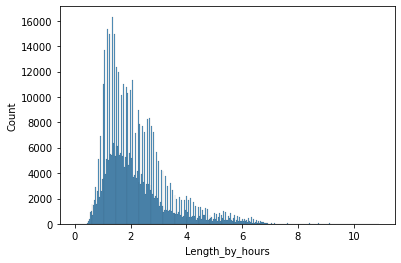

In [ ]:
sns.histplot(Airlines_2['Length_by_hours'])

In [ ]:
departure_period = []
for i in range(0,len(Airlines_2)):
    if ((Airlines_2['Time_by_hour'][i] >= 5) & (Airlines_2['Time_by_hour'][i] < 12)):      
        departure_period.append(0)
    elif ((Airlines_2['Time_by_hour'][i] >= 12) & (Airlines_2['Time_by_hour'][i] < 17)):    
        departure_period.append(1)
    elif ((Airlines_2['Time_by_hour'][i] >= 17) & (Airlines_2['Time_by_hour'][i] < 21)): 
        departure_period.append(2)
    else: 
        departure_period.append(3)

Airlines_2['Departure_period'] = departure_period

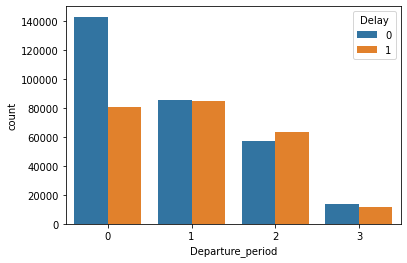

In [ ]:
sns.countplot(data=Airlines_2, x='Departure_period', hue='Delay')
#0 --> Morning | 1 --> Afternoon | 2 --> Evening | 3 --> Night

In [ ]:
week = []
for i in range(0,len(Airlines_2)):
    if ((Airlines_2['DayOfWeek'][i] == 6) | (Airlines_2['DayOfWeek'][i] == 7)):      
        week.append(0)
    else: 
        week.append(1)

Airlines_2['week'] = week

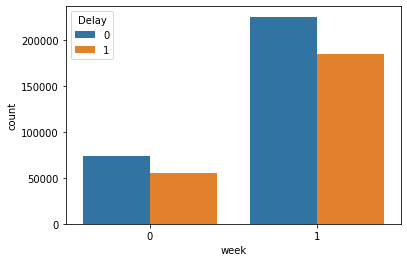

In [ ]:
sns.countplot(data=Airlines_2, x='week', hue='Delay')
#0 --> Weekend | 1 --> Weekday

1. Every day there is a fairly high delay rate but on the third day it has the highest delay intensity.
2. **Southwest Airlines (WN)** is the airline with the highest flight delay rate in the US.
3. Based on flight duration, flights with short travel duration are more likely to experience delays.
4. **Hartsfield-Jackson Atlanta International Airport (ATL)** is an airport that has the highest flight delay rate compared to other airports for both departure and arrival.
5. Based on the flight time period in one day, flights made at night are the least likely to be delayed and flights made at daylight are most likely experience delays.


### **Multivariate Analysis**

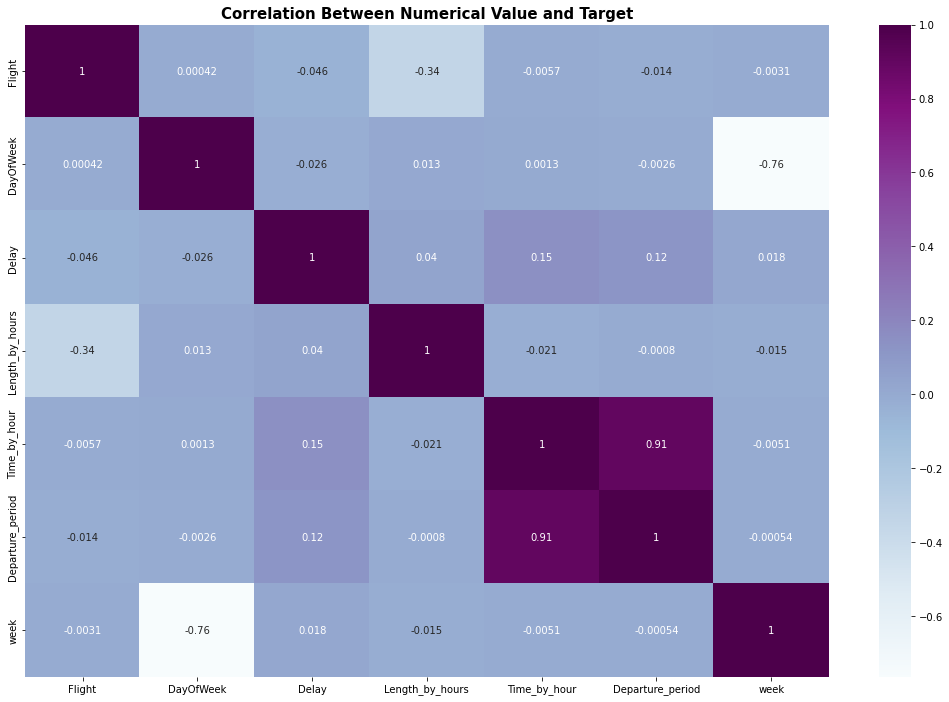

In [ ]:
# Heatmap for the correlation data
correlation = Airlines_2.corr()

plt.figure(figsize = (18, 12))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.title('Correlation Between Numerical Value and Target', fontsize=15, fontweight='bold')
plt.show()

- `Time_by_Hour` (Positive) and `Flight` (Negative) features have the highest correlation with target but not too significant.
- When `Time` ratio is increase, the probability of `Delay` is increasing as well.


# **Feature Engineering**

## **Outlier Handling**

Based on outlier check, outliers at `Length_by_hours` will be removed.


In [ ]:
# Remove outliers based on max value
def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable])

for df1 in [Airlines_2, Airlines_2]:
  df1['Length_by_hours'] = max_value(df1, 'Length_by_hours', 6.750000000000001)

## Split the data for training and test

The data will be splited into train and test data with 80:20 proportion and fully explore the train data.

In [ ]:
# Split train and test data into 80:20 proportion
train_data_2, test_data_2 = train_test_split(Airlines_2, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
train_data_2.head(5)

In [ ]:
test_data_2.head(5)

## **Categorical Data Handling**

For handling category data, will choose **"Frequency Encoding"**  since each column `'Airline'`, `'AirportTo'`, and `'AirportFrom'` have more than 2 distinct values 

In [ ]:
train_data_2.info()

In [ ]:
# grouping by frequency
fqtto = train_data_2.groupby('AirportTo').size()/len(train_data_2)
# mapping values to dataframe
train_data_2.loc[:, "{}_freq_encode".format('AirportTo')] = train_data_2['AirportTo'].map(fqtto)
# drop original column.
train_data_2 = train_data_2.drop(['AirportTo'], axis=1)

In [ ]:
# grouping by frequency
fqta = train_data_2.groupby('Airline').size()/len(train_data_2)
# mapping values to dataframe
train_data_2.loc[:, "{}_freq_encode".format('Airline')] = train_data_2['Airline'].map(fqta)
# drop original column.
train_data_2 = train_data_2.drop(['Airline'], axis=1)

In [ ]:
# grouping by frequency
fqtfr = train_data_2.groupby('AirportFrom').size()/len(train_data_2)
# mapping values to dataframe
train_data_2.loc[:, "{}_freq_encode".format('AirportFrom')] = train_data_2['AirportFrom'].map(fqtfr)
# drop original column.
train_data_2 = train_data_2.drop(['AirportFrom'], axis=1)

## **Resampling**

In [ ]:
# Quantity Delay column
train_data_2['Delay'].value_counts()

0    239240
1    192266
Name: Delay, dtype: int64

Since the data is imbalance, we'll handle undersampling.

In [ ]:
# Split train data become x and y
x_train = train_data_2.drop(columns='Delay')
y_train = train_data_2['Delay']

In [ ]:
x_train, y_train = under_sampling.RandomUnderSampler(sampling_strategy='majority').fit_resample(x_train, y_train)

In [ ]:
# Insanity check
y_train.value_counts()

0    192266
1    192266
Name: Delay, dtype: int64

Now data train is balance.

## **Scaling**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

In [ ]:
x_train_scaled

array([[0.93839964, 0.76705491, 0.5       , ..., 0.72023096, 0.28801242,
        0.01549542],
       [0.2546331 , 0.10444132, 0.33333333, ..., 0.27315975, 0.17152332,
        0.24818129],
       [0.19762876, 0.06105209, 0.16666667, ..., 0.12368813, 0.24937557,
        0.34344537],
       ...,
       [0.10175757, 0.28810956, 0.83333333, ..., 0.13850456, 0.28801242,
        0.04423105],
       [0.48051096, 0.81914757, 0.5       , ..., 0.34204888, 0.50202498,
        0.00796595],
       [0.22610775, 0.37770383, 0.33333333, ..., 0.24737626, 0.62645876,
        0.17732431]])

## **Test Data Processing**

Test data will be treated as same as train data.

In [ ]:
test_data_2.info()

In [ ]:
# grouping by frequency
fqteto = test_data_2.groupby('AirportTo').size()/len(test_data_2)
# mapping values to dataframe
test_data_2.loc[:, "{}_freq_encode".format('AirportTo')] = test_data_2['AirportTo'].map(fqteto)
# drop original column.
test_data_2 = test_data_2.drop(['AirportTo'], axis=1)

In [ ]:
# grouping by frequency
fqtea = test_data_2.groupby('Airline').size()/len(test_data_2)
# mapping values to dataframe
test_data_2.loc[:, "{}_freq_encode".format('Airline')] = test_data_2['Airline'].map(fqtea)
# drop original column.
test_data_2 = test_data_2.drop(['Airline'], axis=1)

In [ ]:
# grouping by frequency
fqtefro = test_data_2.groupby('AirportFrom').size()/len(test_data_2)
# mapping values to dataframe
test_data_2.loc[:, "{}_freq_encode".format('AirportFrom')] = test_data_2['AirportFrom'].map(fqtefro)
# drop original column.
test_data_2 = test_data_2.drop(['AirportFrom'], axis=1)

In [ ]:
# Split test data become x and y
x_test = test_data_2.drop(columns='Delay')
y_test = test_data_2['Delay']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_test)

x_test_scaled = scaler.transform(x_test)

# **Modelling and Evaluation**

After some preprocessing data, I will re-create model with same algorithms with baseline. Since the data is imbalance, I will use AUC as evaluation metric.

In [ ]:
models = [LogisticRegression(random_state=42),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          lgb.LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

modeled = pd.DataFrame(columns = ['Method', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC'])

In [ ]:
for model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    model = str(type(model)).split('.')[-1][:-2]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall)/(precision + recall)

    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
  
    modeled = modeled.append({'Method': model, 
                           'Precision': precision, 
                              'Recall': recall,
                            'F1-Score': f1,
                             'ROC_AUC': roc_auc},
                            ignore_index=True)

In [ ]:
modeled

,Method,Precision,Recall,F1-Score,ROC_AUC
0,LogisticRegression,0.573482,0.606900,0.589718,0.622544
1,DecisionTreeClassifier,0.557325,0.614755,0.584633,0.611674
2,RandomForestClassifier,0.640203,0.660757,0.650317,0.681545
3,LGBMClassifier,0.629772,0.647235,0.638384,0.671118
4,XGBClassifier,0.607980,0.632693,0.620090,0.652842


## **AUC Each Model**

In [ ]:
# Retrieve Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

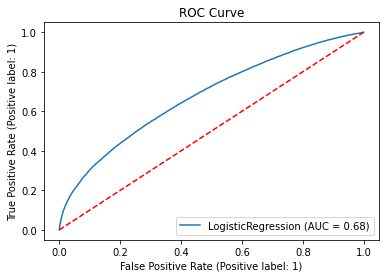

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(logreg, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [ ]:
# Retrieve Decision Tree classifier model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

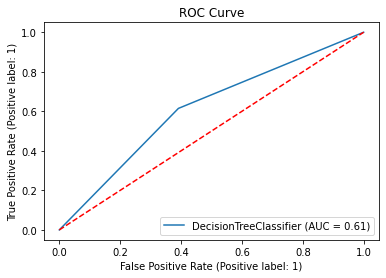

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(dt_clf, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [ ]:
# Retrieve Random Forest classifier model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

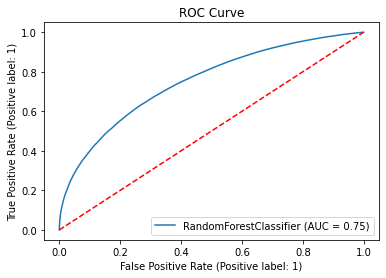

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(rf_clf, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [ ]:
# Retrieve XG Boost classifier model
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train_scaled, y_train)

XGBClassifier(random_state=42)

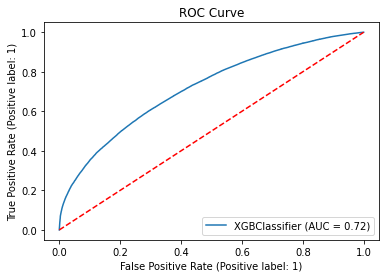

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(xgb, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [ ]:
# Retrieve Light XG Boost classifier model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(x_train_scaled, y_train)

LGBMClassifier(random_state=42)

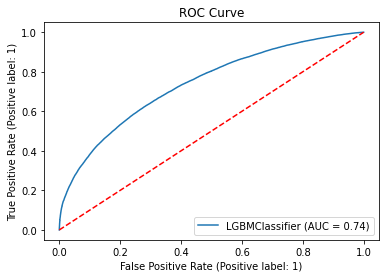

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(lgbm, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# **Hyperparameter Tuning**

Random Forest model have the best AUC score, we will try to increase the performance by hyperparameter tuning.

In [ ]:
# Set parameter for tuning
%%time
parameters = {
    'n_estimators': (70,80,90,100),
    'max_depth':(20,30,40,50)
}

# Hyperparameter using GridSearchCV
rf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='roc_auc')
rf_gridcv.fit(x_train_scaled, y_train)

CPU times: user 1h 51min 12s, sys: 9.36 s, total: 1h 51min 21s
Wall time: 1h 52min 5s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (20, 30, 40, 50),
                         'n_estimators': (70, 80, 90, 100)},
             scoring='roc_auc')

In [ ]:
# Get the best parameters from the cross-validation method
print("Best Tuned Hyperparameters are:", rf_gridcv.best_params_)

Best Tuned Hyperparameters are: {'max_depth': 20, 'n_estimators': 100}


## Confusion Matrix

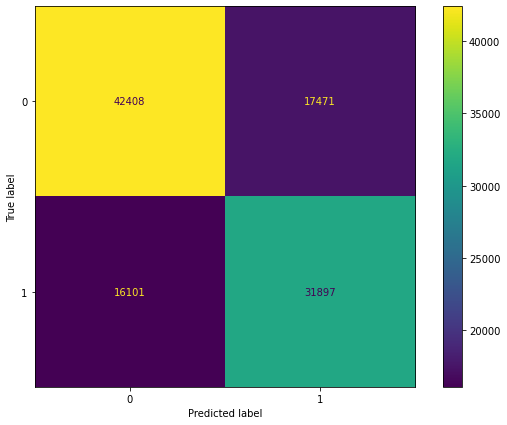

In [ ]:
# Create confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred_rf = rf_gridcv.best_estimator_.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Get classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72     59879
           1       0.65      0.66      0.66     47998

    accuracy                           0.69    107877
   macro avg       0.69      0.69      0.69    107877
weighted avg       0.69      0.69      0.69    107877



In [ ]:
# Get ROC_AUC score
print(f'ROC AUC score = {roc_auc_score(y_test,y_pred_rf)}')

ROC AUC score = 0.6863883915900539


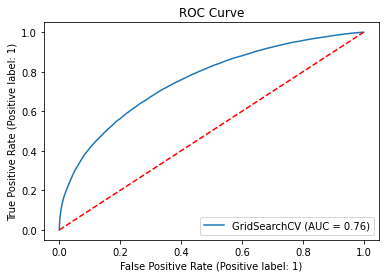

In [ ]:
# Create ROC curve
metrics.plot_roc_curve(rf_gridcv, x_test_scaled, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# **Potential Impact in Business**

The biggest question for model of course, how big impact our model to business problems? I will do simulation based on predictive model result for business terms.

## **Example Case**

[JetBlue Airlines](https://travelsort.com/us-airlines-pay-hotel-meal-airline-caused-delays/) handle flight delays in different ways, depending on the cause and length of the delay. Common practices include:

*   Rebooking passengers on alternative flights: If a delay is expected to be 
short, airlines may offer to rebook passengers on the next available flight.
*   Compensating passengers: Depending on the circumstances of the delay, airlines may be required to compensate passengers for the inconvenience caused.
*   Providing meal vouchers or accommodation: If a delay extends into the night, airlines may provide passengers with food or hotel vouchers to cover their expenses. 

For the compensation which airlines must providing Meal Vouchers or accomodation, JetBlue Airlines has conditions and limitations in providing vouchers to passengers who experience cancellations

*   Customer Meal Voucher = 12 USD
*   Hotel vouchers that can be used at a partner hotel up to 200 USD


In [ ]:
# Voucher compensation cost in a month
# Assuming there are 1000 JetBlue flights made in one month at Hartsfield-Jackson Atlanta International Airport
# Assuming there are 138 passengers in one aircraft

Meal_vouch = 12 * 30 * 1000 * 138
Hotel_vouch = 200 * 30 * 1000 * 138

Total_month_budget = Meal_vouch + Hotel_vouch

print('Cost budget for voucher compensation in a month is ' + str(Total_month_budget) + ' USD')

Cost budget for voucher compensation in a month is 877680000 USD


**After**

The main idea is that with the results of our prediction model, we can predict flight delays for an airline, thereby saving costs for compensation vouchers.

Note:
- Customer Meal Voucher = 12 USD
- Hotel vouchers that can be used at a partner hotel up to 200 USD

So based on TPR result, assuming there's 1000 flight in a month, model can predict 67% or around 670 flight will experience delay.

In [ ]:
# Predicted Voucher compensation will cost
Meal_pred =  12 * 30 * 670 * 138
Hotel_pred = 200 * 30 * 670 * 138

Total_pred = Meal_pred + Hotel_pred

print('Estimated total projected budget for compensation vouchers in a month to be paid '+ str(Total_pred) + ' USD')

Estimated total projected budget for compensation vouchers in a month to be paid 588045600 USD


In [ ]:
# Saving compensation cost

Total_saved = Total_month_budget - Total_pred

ratio = round(((Total_saved / Total_month_budget) * 100),0)

print('Cost budget for voucher compensation in a month can be saved '+ str(Total_saved) + ' USD or ' + str(ratio) + ' %')

Cost budget for voucher compensation in a month can be saved 289634400 USD or 33.0 %


# **Feature Importances**

In [ ]:
from sklearn.inspection import permutation_importance
importances = rf_gridcv.best_estimator_.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 9))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Based on Features Importance value, `Airline_freq_encode`feature have the highest effect on the prediction.

# **Conclusion**



*   Based on Heatmap and feature importances, **Airline** and **TIme_by_hour** has the big correlation with the flight delay.
*   From several model algorithm that used, Random Forest classifier is the best model algorithm for predicting the flight delay because have the highest AUC score than other classifier algorithm.
*   There are no specific days where the lowest delay rate is found in one week, but the highest delays often occur on the second and third days (Tuesday and Wednesday).
*   Based on the simulation, the performance of the prediction model can help save the Airline company's budget for compensation vouchers by **33%**.